# AIN429 - Assignment 3 - b2210765024

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


Import necessary libraries and read the dataset

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth 


In [3]:
data = pd.read_csv("data.csv")

In [4]:
print(data)

       Member_no        Date                   item
0           1808  21-07-2015         tropical fruit
1           2552  05-01-2015             whole milk
2           2300  19-09-2015              pip fruit
3           1187  12-12-2015       other vegetables
4           3037  01-02-2015             whole milk
...          ...         ...                    ...
38760       4471  08-10-2014          sliced cheese
38761       2022  23-02-2014                  candy
38762       1097  16-04-2014               cake bar
38763       1510  03-12-2014  fruit/vegetable juice
38764       1521  26-12-2014               cat food

[38765 rows x 3 columns]


## Preprocess and reformat the dataset

In [5]:
data.isnull().sum() #No null values

Member_no    0
Date         0
item         0
dtype: int64


In the context of pattern mining, the focus is not on individual buyers, but on identifying items acquired collectively in a single basket. To achieve this, the dataset requires reformatting, representing the items purchased by a specific member on a given date:

'Member - Date' : 'item'


In [6]:
grouped_data = data.groupby(['Member_no', 'Date'])['item'].agg(list).reset_index()

grouped_data['Member - Date'] = grouped_data['Member_no'].astype(str) + ' - ' + grouped_data['Date']
grouped_data = grouped_data.drop(['Member_no', 'Date'], axis=1)

grouped_data = grouped_data[['Member - Date', 'item']]

print(grouped_data)
In the context of pattern mining, the emphasis lies not on identifying individual buyers, but on discerning items acquired collectively in a single basket. To facilitate this, the dataset requires reformatting, portraying the items purchased by a specific member on a given date.

           Member - Date                                               item
0      1000 - 15-03-2015  [sausage, whole milk, semi-finished bread, yog...
1      1000 - 24-06-2014                  [whole milk, pastry, salty snack]
2      1000 - 24-07-2015                     [canned beer, misc. beverages]
3      1000 - 25-11-2015                        [sausage, hygiene articles]
4      1000 - 27-05-2015                         [soda, pickled vegetables]
...                  ...                                                ...
14958  4999 - 24-01-2015  [tropical fruit, berries, other vegetables, yo...
14959  4999 - 26-12-2015                             [bottled water, herbs]
14960  5000 - 09-03-2014                    [fruit/vegetable juice, onions]
14961  5000 - 10-02-2015       [soda, root vegetables, semi-finished bread]
14962  5000 - 16-11-2014                   [bottled beer, other vegetables]

[14963 rows x 2 columns]


## Analyze the dataset

<Figure size 1000x600 with 0 Axes>

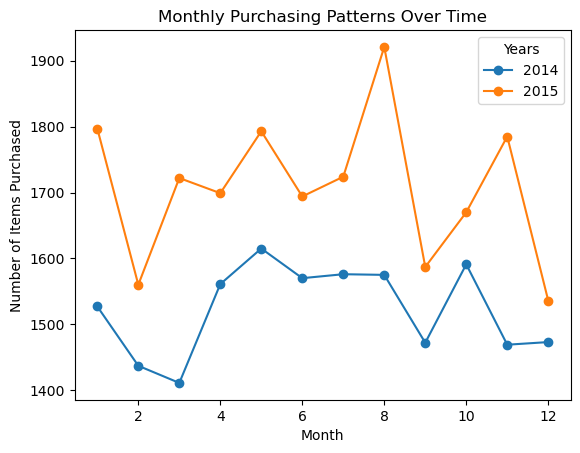

In [7]:
grouped_data_copy = grouped_data.copy()

# Convert 'Member - Date' to datetime format in the copied DataFrame
grouped_data_copy['Member - Date'] = pd.to_datetime(grouped_data_copy['Member - Date'].str.split(' - ', expand=True)[1], format='%d-%m-%Y')

grouped_data_copy['Year'] = grouped_data_copy['Member - Date'].dt.year
grouped_data_copy['Month'] = grouped_data_copy['Member - Date'].dt.month

# Calculate the total number of items purchased each month in the copied DataFrame
monthly_item_counts_copy = grouped_data_copy.groupby(['Year', 'Month'])['item'].apply(lambda x: pd.Series(x.sum())).reset_index()

pivot_table_copy = monthly_item_counts_copy.pivot_table(index='Month', columns='Year', values='item', aggfunc='count', fill_value=0)

plt.figure(figsize=(10, 6))
pivot_table_copy.plot(kind='line', marker='o')
plt.title('Monthly Purchasing Patterns Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Items Purchased')
plt.legend(title='Years', loc='upper right')
plt.show()

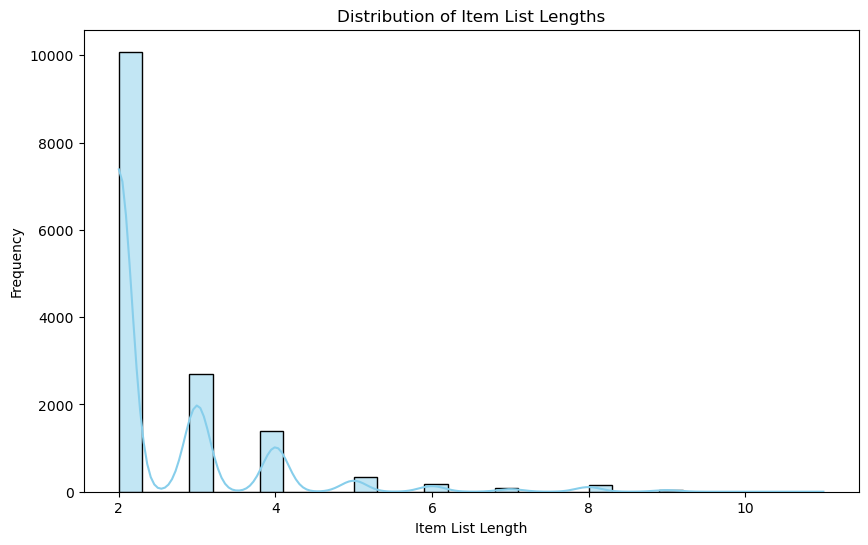

count    14963.000000
mean         2.590724
std          1.117469
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: item, dtype: float64


In [8]:
item_lengths = grouped_data['item'].apply(len)



plt.figure(figsize=(10, 6))
sns.histplot(item_lengths, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Item List Lengths')
plt.xlabel('Item List Length')
plt.ylabel('Frequency')
plt.show()
print(item_lengths.describe())

### Explain analysis results

Graph 1 indicates a decrease in purchasing during the winter months, reaching its peak in the summer, notably in August. Although the numbers vary, it can be concluded that sales are lowest in September, with a slight recovery in October. With this insight, the company can adapt its stock and customer expectations accordingly.

In Graph 2, the majority of customers tend to buy two items simultaneously. Therefore, if we planning a promotion, pairing products, such as beer with nuts or seeds with coke, could capture the customer's interest.

Encode the dataset to apply algorithms

In [9]:
train_data = grouped_data['item']
train_data

0        [sausage, whole milk, semi-finished bread, yog...
1                        [whole milk, pastry, salty snack]
2                           [canned beer, misc. beverages]
3                              [sausage, hygiene articles]
4                               [soda, pickled vegetables]
                               ...                        
14958    [tropical fruit, berries, other vegetables, yo...
14959                               [bottled water, herbs]
14960                      [fruit/vegetable juice, onions]
14961         [soda, root vegetables, semi-finished bread]
14962                     [bottled beer, other vegetables]
Name: item, Length: 14963, dtype: object

In [10]:
te = TransactionEncoder()
train_data = te.fit(train_data).transform(train_data)

In [11]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [12]:
train_data = pd.DataFrame(train_data, columns = te.columns_)

In [13]:
train_data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apply Apriori Algorithm (min_support = 0.01)

In [14]:
apriori(train_data, min_support = 0.01, use_colnames = True).sort_values(by = 'support', ascending = False)

,support,itemsets
62,0.157923,(whole milk)
40,0.122101,(other vegetables)
46,0.110005,(rolls/buns)
52,0.097106,(soda)
63,0.085879,(yogurt)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
29,0.010559,(herbs)
45,0.010493,(red/blush wine)
44,0.010158,(processed cheese)


## Apply FP-growth algorithm (min_support = 0.01)

In [15]:
fpgrowth(train_data, min_support = 0.01, use_colnames = True).sort_values(by = 'support',ascending = False)

,support,itemsets
0,0.157923,(whole milk)
15,0.122101,(other vegetables)
11,0.110005,(rolls/buns)
8,0.097106,(soda)
1,0.085879,(yogurt)
...,...,...
67,0.010559,"(rolls/buns, other vegetables)"
37,0.010559,(herbs)
26,0.010493,(red/blush wine)
47,0.010158,(processed cheese)


## Compare the algorithms' performances

In [16]:
print("Performance for Apriori : ", end = "")
%timeit -n 100 -r 10 apriori(train_data, min_support = 0.01)

Performance for Apriori : 146 ms ± 2.33 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [17]:
print("Performance for FPGrowth : ", end = "")

%timeit -n 100 -r 10 fpgrowth(train_data, min_support = 0.01)

Performance for FPGrowth : 75.9 ms ± 2.55 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


### Visualize the comparison

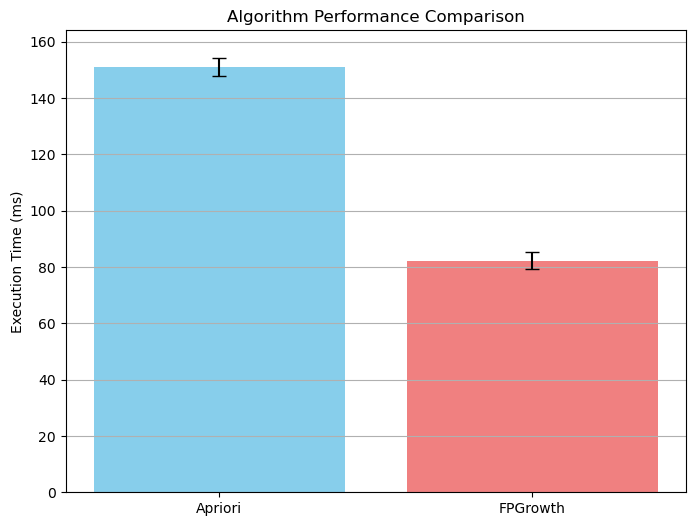

In [18]:
algorithms = ['Apriori', 'FPGrowth']
mean_times = [151, 82.3]
std_dev_times = [3.09, 2.9]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(algorithms, mean_times, yerr=std_dev_times, capsize=5, color=['skyblue', 'lightcoral'])
ax.set_ylabel('Execution Time (ms)')
ax.set_title('Algorithm Performance Comparison')
ax.set_ylim(0, max(mean_times) + max(std_dev_times) + 10)
ax.grid(axis='y')

plt.show()

## Summarize and interpret the results

This assignment introduces a preprocessed dataset with 38,000 entries, including information about members, dates, and the items they purchased.

The initial steps involved importing necessary libraries, reading the dataset, and ensuring data integrity by checking for null values. Subsequently, the dataset is formatted to meet algorithm implementation conditions.
An analysis was conducted through visualization, with the interpretation of patterns within the dataset.

The data was encoded to meet the algorithmic requirements. Both Apriori and FP-growth algorithms were applied to the dataset, revealing identical outcomes—highlighting the correct functionality of the algorithms. Notably, whole milk has the highest support value, while soft cheese has the lowest.

Concluding the assignment, a comparison between the two algorithms was made. It was observed that FP-growth performed significantly faster, due to its avoidance of repeated subset generation, a characteristic of the Apriori algorithm.